### Adjacency Matrix
 
* An adjacency matrix for a graph (digraph) G (V, A) is an M matrix of dimension | V x V where the element M i, j will be equal to 1, there is an edge from i to j or 0, otherwise.

In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline

In [1]:
class Graph:

    def __init__(self, nodes):
        self.nodes = nodes
        self.graph = np.zeros((nodes, nodes), dtype=int)

    def add_edge(self, u, v):
        self.graph[u - 1][v - 1], self.graph[v - 1][u - 1] = 1, 1

    def graph_data(self):
        data = pd.DataFrame(self.graph, index=[idx for idx in range(0, self.nodes)],
                            columns=[idx for idx in range(0, self.nodes)])
        adjacency_matrix = data.values
        return data, adjacency_matrix

    def relation(self):
        _, rel = self.graph_data()
        rows, cols = np.where(rel == 1)
        edges = zip(rows.tolist(), cols.tolist())
        for edge in edges:
            print(f"\nedge ==> {edge} = {1}", end='')

    def plot_graph(self):
        _, adjacency_matrix = self.graph_data()
        rows, cols = np.where(adjacency_matrix == 1)
        edges = zip(rows.tolist(), cols.tolist())
        G = nx.Graph()
        G.add_edges_from(edges)
        pos = nx.spring_layout(G)
        nx.draw(G, pos, node_size=500, labels={node: node for node in G.nodes()}, node_color='pink', edge_color='black')
        nx.draw_networkx_edge_labels(G, pos, edge_labels={edge: 1 for edge in G.edges()}, font_color='red')
        plt.show()

In [3]:
graph = Graph(5)
graph.add_edge(1, 3)
graph.add_edge(3, 4)
graph.add_edge(2, 3)
graph.add_edge(3, 5)
graph.add_edge(4, 5)

In [4]:
data, adjacency_matrix = graph.graph_data()

In [5]:
data.head()

,0,1,2,3,4
0,0,0,1,0,0
1,0,0,1,0,0
2,1,1,0,1,1
3,0,0,1,0,1
4,0,0,1,1,0


In [6]:
graph.relation()


edge ==> (0, 2) = 1
edge ==> (1, 2) = 1
edge ==> (2, 0) = 1
edge ==> (2, 1) = 1
edge ==> (2, 3) = 1
edge ==> (2, 4) = 1
edge ==> (3, 2) = 1
edge ==> (3, 4) = 1
edge ==> (4, 2) = 1
edge ==> (4, 3) = 1

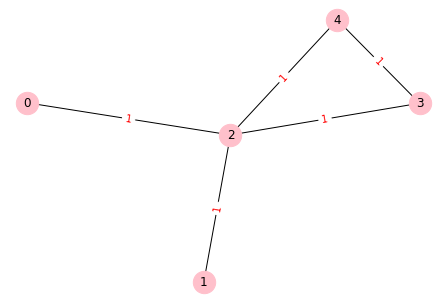

In [8]:
graph.plot_graph()